In [18]:
# Load the bank_Notes_dataset

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [11]:
df=pd.read_csv("run_or_walk.csv")

df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
df.shape

(88588, 11)

In [5]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [12]:
# here data , time and usename columns are not required
df.drop(['date','time','username'], axis=1, inplace=True)

In [13]:
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [15]:
df.describe()
#here gyro_x,gyro_y and gyro_z having outlier
# we need to scale the data

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


<Figure size 1080x1080 with 0 Axes>

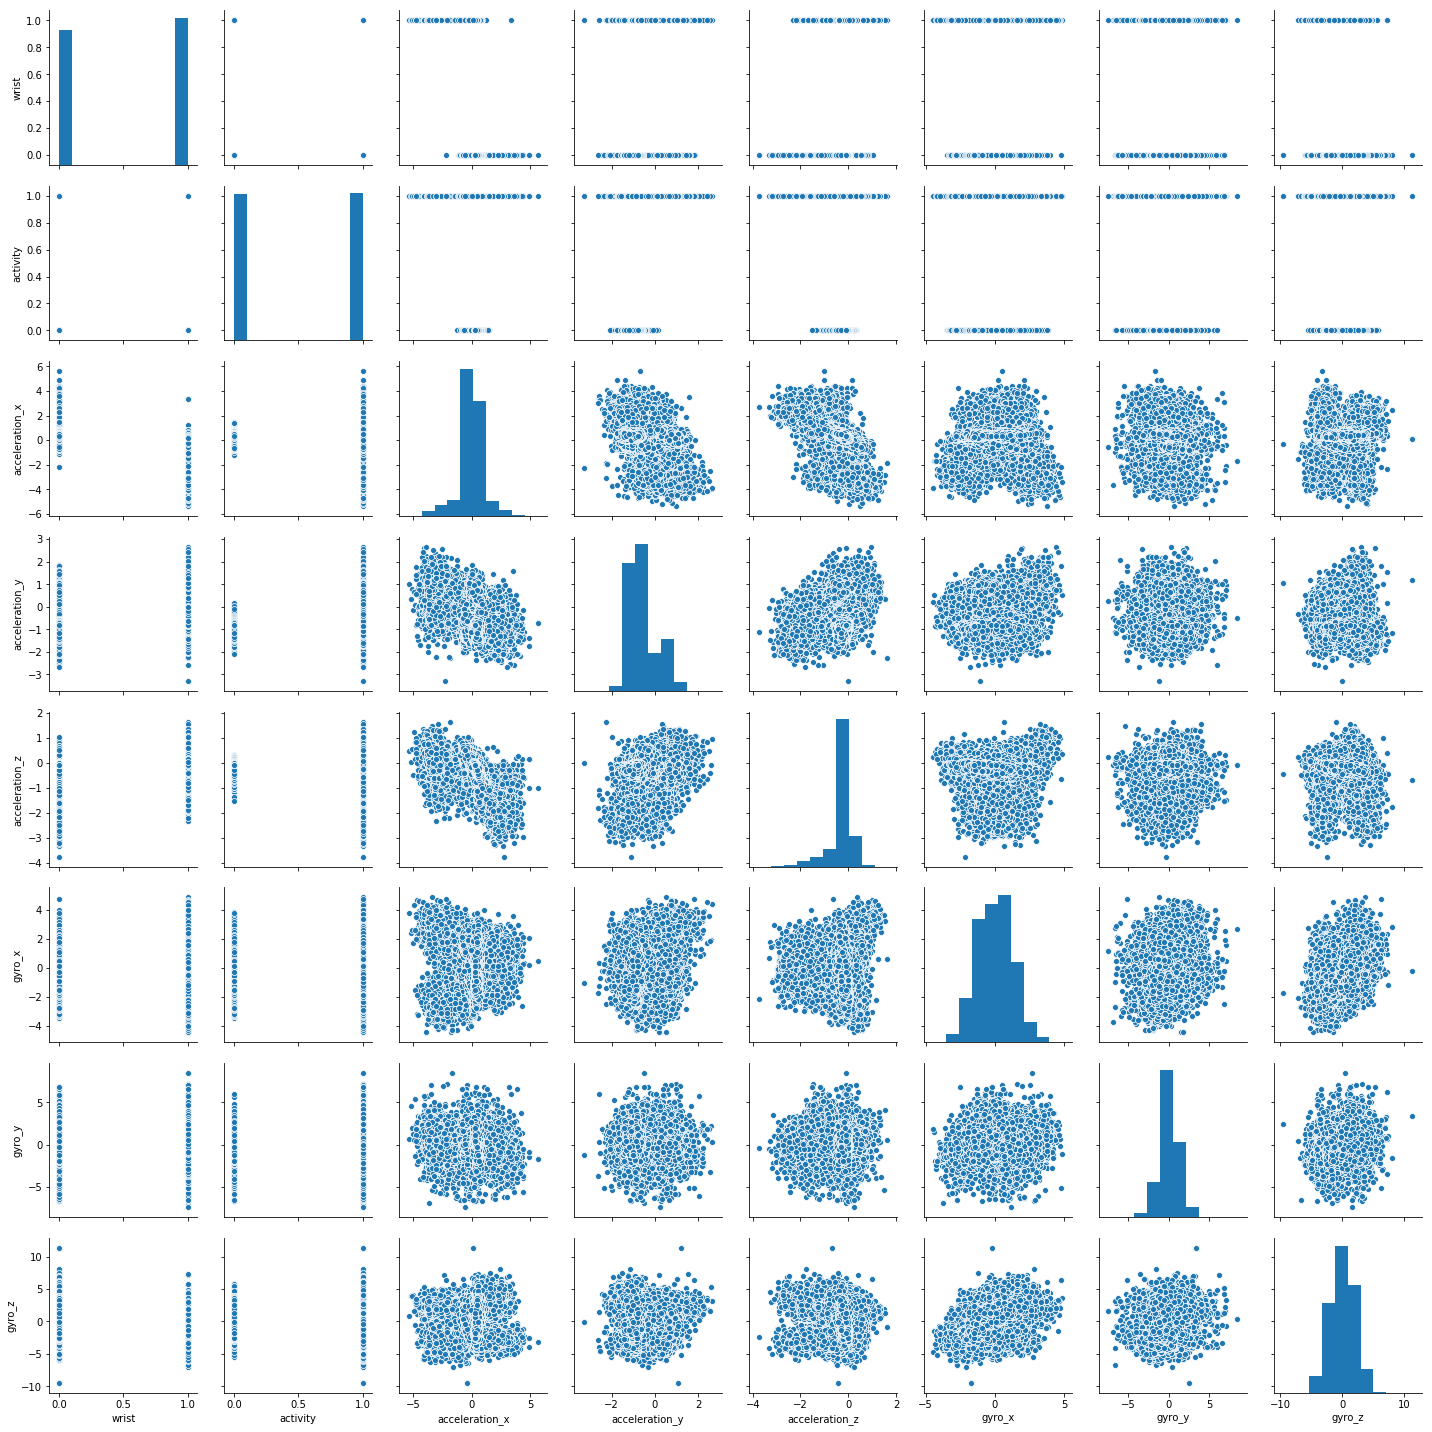

In [19]:
# make pair plot of all numeric data
plt.figure(figsize=(15, 15))
sns.pairplot(df)
plt.show()

In [14]:
df.activity.value_counts()
# looks like the data is balance

1    44365
0    44223
Name: activity, dtype: int64

In [21]:
#df.iloc[:,1:]
df.columns

#'wrist', 'activity', 'acceleration_x', 'acceleration_y',
#       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'

Index(['wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [41]:
df.dtypes

wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [42]:
X=df[['wrist', 'acceleration_x', 'acceleration_y','acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
y=df[['activity']]

In [43]:
X.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [44]:
y.head()

,activity
0,0
1,0
2,0
3,0
4,0


In [45]:
# Apply standard scaler method to numerical columns to make them scaling and normalized
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()   # we are making the object of StandardScaler
num_col=['wrist', 'acceleration_x', 'acceleration_y','acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
# fit scaler on numeric features
ss.fit(X[num_col])  # fit method learns the range of the data

# scale numeric features now
#X = ss.transform(X) 
X[num_col] = ss.transform(df[num_col]) 
# transform method transforms the data. See the o/p. You would see a much reduced range.  

# view updated feature
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,-1.045368,0.336683,-0.332316,0.629311,-0.050391,-0.003924,-1.541949
1,-1.045368,0.740133,-0.851562,0.163423,-0.143496,-0.013684,0.054624
2,-1.045368,0.509972,-1.395867,0.793235,-0.729734,0.057642,-1.284481
3,-1.045368,0.374432,-0.379548,0.827334,0.092339,-0.372984,-1.544039
4,-1.045368,0.551090,-0.559819,0.718668,0.038726,0.334271,1.290147
5,-1.045368,0.474799,-0.369069,0.448543,0.549171,-0.212813,1.333397
6,-1.045368,0.700304,-0.860219,0.032366,0.040401,-0.189205,0.221986
7,-1.045368,0.734981,-1.196309,0.464155,-0.649075,-0.693243,-0.761135
8,-1.045368,0.342033,-0.456698,0.910528,-0.336249,-0.189872,-1.409428
9,-1.045368,0.538804,-0.776690,0.689910,0.027636,0.927571,0.875398


In [47]:
X.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,-1.045368,0.336683,-0.332316,0.629311,-0.050391,-0.003924,-1.541949
1,-1.045368,0.740133,-0.851562,0.163423,-0.143496,-0.013684,0.054624
2,-1.045368,0.509972,-1.395867,0.793235,-0.729734,0.057642,-1.284481
3,-1.045368,0.374432,-0.379548,0.827334,0.092339,-0.372984,-1.544039
4,-1.045368,0.551090,-0.559819,0.718668,0.038726,0.334271,1.290147


In [49]:
# Split data into Training and Testing
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=10)

In [51]:
## Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train) 


# Predict over test_data. 

y_pred=model.predict(X_test)
#print(y_pred)



# Print the accuracy and classification_report.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("=====Confusion Matrix ===============")
print(confusion_matrix(y_test,y_pred))
print("=============Classification Report===========================")
print(classification_report(y_test,y_pred))
print("===============Accuracy Score=========================")
print(accuracy_score(y_test,y_pred))

## Apply Naive Bayes we have reached 95% Accuracy

C:\Users\234680\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


=====Confusion Matrix ===============
[[8703   93]
 [ 645 8277]]
=============Classification Report===========================
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8796
           1       0.99      0.93      0.96      8922

    accuracy                           0.96     17718
   macro avg       0.96      0.96      0.96     17718
weighted avg       0.96      0.96      0.96     17718

===============Accuracy Score=========================
0.9583474432780223


In [54]:
##Apply SVN for better accuracy

from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf', gamma='auto') 
# ths is applicable for binary classification
svclassifier.fit(X_train, y_train)

# Prediction and Evaluation
y_pred = svclassifier.predict(X_test)  


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("=====Confusion Matrix ===============")
print(confusion_matrix(y_test,y_pred))
print("=============Classification Report===========================")
print(classification_report(y_test,y_pred))
print("===============Accuracy Score=========================")
print(accuracy_score(y_test,y_pred))

## So apply SVN we are getting better accuracy to 99%

C:\Users\234680\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


=====Confusion Matrix ===============
[[8741   55]
 [  88 8834]]
=============Classification Report===========================
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8796
           1       0.99      0.99      0.99      8922

    accuracy                           0.99     17718
   macro avg       0.99      0.99      0.99     17718
weighted avg       0.99      0.99      0.99     17718

===============Accuracy Score=========================
0.9919291116378823
